In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
bli_oecd = pd.read_csv("./BLI_07012022180640920.csv", thousands=",", decimal=".")
gdp_per_capita = pd.read_csv("./WEO_Data.csv", thousands = ",", delimiter = ";", na_values="n/a")

In [3]:
# Filter the bli table to show total average life satisfaction index

bli_avgscore = bli_oecd[bli_oecd["Indicator"] == "Life satisfaction"]
bli_avgscore = bli_avgscore[bli_avgscore["INEQUALITY"] == "TOT"]

In [4]:
gdp_bli_merged = pd.merge(bli_avgscore, gdp_per_capita, how="left")

In [5]:
# Create a dataframe with all the data for training

training_data = pd.DataFrame({
"Acronym": gdp_bli_merged["LOCATION"], 
"Country": gdp_bli_merged["Country"],
"Happiness_score": gdp_bli_merged["Value"],
"GDP_per_capita": gdp_bli_merged["2021"]}).dropna()

In [6]:
# Isolate the dependent and independent variables

x = np.c_[training_data["GDP_per_capita"]]
y = np.c_[training_data["Happiness_score"]]

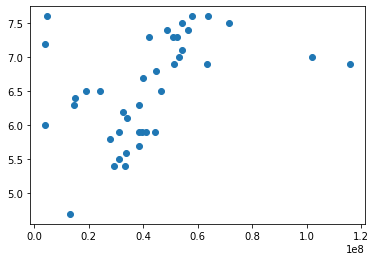

In [7]:
# Data visualization

plt.scatter(training_data["GDP_per_capita"], training_data["Happiness_score"])

In [8]:
# Creating the model

model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [9]:
# Predicting life satisfaction using GDP as the predictor

gdp_per_capita = gdp_per_capita.dropna()
model.predict(gdp_per_capita[["2021"]])

array([[5.97329636],
       [6.10500669],
       [6.04082987],
       [6.19434678],
       [6.24675386],
       [6.40063702],
       [6.66444841],
       [6.71458873],
       [5.99795369],
       [6.6341521 ],
       [6.02690522],
       [6.13569834],
       [6.22849363],
       [6.66991844],
       [6.03979018],
       [6.00111526],
       [6.10893709],
       [6.06749203],
       [6.17334982],
       [6.1606154 ],
       [6.79491516],
       [6.28461469],
       [5.98476626],
       [5.9634322 ],
       [6.04030796],
       [6.01661901],
       [6.00290769],
       [6.63366314],
       [5.96621172],
       [5.97442609],
       [6.29315603],
       [6.19804749],
       [6.15745179],
       [5.99343499],
       [5.96886139],
       [6.00839422],
       [6.2301077 ],
       [6.02678689],
       [5.95894149],
       [6.76582939],
       [6.03359663],
       [6.11734613],
       [6.2217976 ],
       [6.10116641],
       [6.12542237],
       [6.0758311 ],
       [6.1930238 ],
       [6.074